In [14]:
#Reading in necessary data and libraries

library(tidyverse)
library(tidymodels)
player_data <- read_csv("https://raw.githubusercontent.com/nyue324/Dsci100-project/refs/heads/main/players.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Can age predict a player's hours played?

# A tibble: 3 × 3
  .metric .estimator  .estimate
  <chr>   <chr>           <dbl>
1 rmse    standard   31.0      
2 rsq     standard    0.0000215
3 mae     standard   10.7      


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


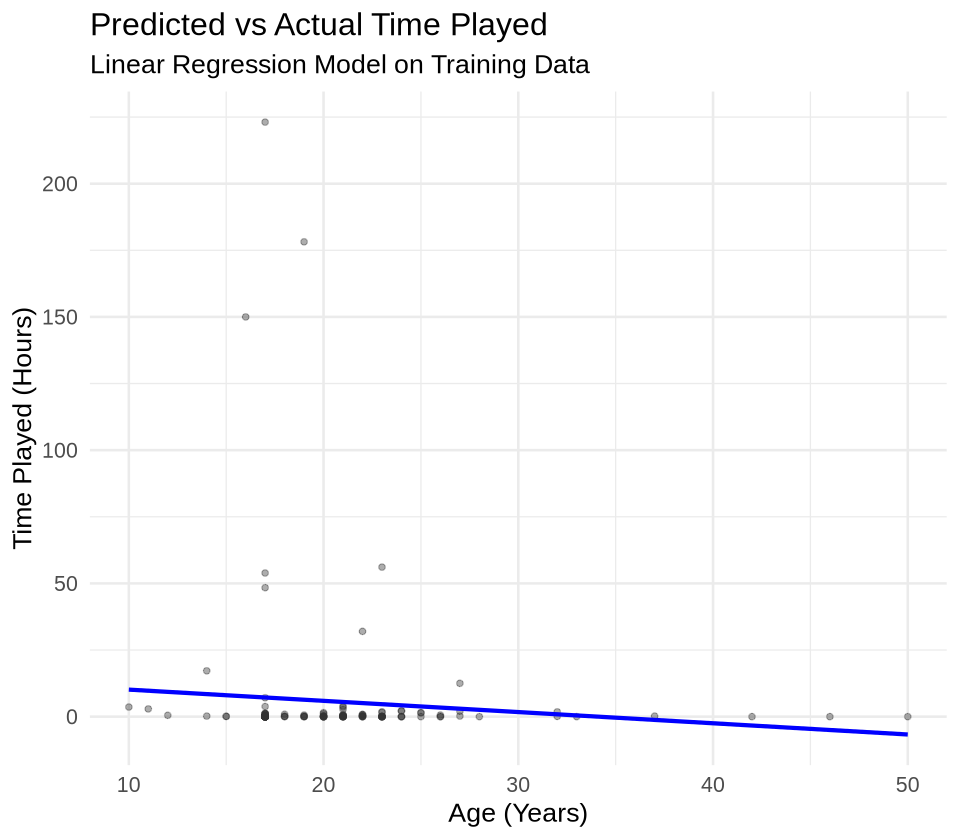

In [51]:
set.seed(123)

# ───────────────────────────────────────
# 1. Data Preparation
# ───────────────────────────────────────

player_data_filtered <- player_data |>
  select(played_hours, Age)

# ───────────────────────────────────────
# 2. Train/Test Split (Stratify by Age)
# ───────────────────────────────────────

players_split <- initial_split(player_data_filtered, prop = 0.75, strata = Age)
players_training <- training(players_split)
players_testing <- testing(players_split)

# ───────────────────────────────────────
# 3. Define Recipe
# ───────────────────────────────────────

lm_recipe <- recipe(played_hours ~ Age, data = players_training)

# ───────────────────────────────────────
# 4. Model Specification
# ───────────────────────────────────────

lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# ───────────────────────────────────────
# 5. Workflow Creation and Model Fitting
# ───────────────────────────────────────

lm_workflow <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = players_training)

# ───────────────────────────────────────
# 6. Predict on Test Set
# ───────────────────────────────────────

predictions <- predict(lm_workflow, new_data = players_testing) |>
  bind_cols(players_testing)

# ───────────────────────────────────────
# 7. Evaluate Model Performance
# ───────────────────────────────────────

lm_metrics <- predictions |>
  metrics(truth = played_hours, estimate = .pred)

lm_rmspe <- lm_metrics |>
  filter(.metric == "rmse") |>
  pull(.estimate)

print(lm_metrics)

# ───────────────────────────────────────
# 8. Visualize Predictions (on Training Set)
# ───────────────────────────────────────

training_preds <- predict(lm_workflow, new_data = players_training) |>
  bind_cols(players_training)

lm_plot <- training_preds |>
  ggplot(aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4, color = "#333333") +
  geom_line(aes(y = .pred), color = "blue", linewidth = 1.2) +
  labs(title = "Predicted vs Actual Time Played",
    x = "Age (Years)",
    y = "Time Played (Hours)") +
  theme_minimal(base_size = 16)

# Display plot
print(lm_plot)